In [1]:
import cdsapi

In [10]:
import nctoolkit as nc

Please install CDO version 1.9.7 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo


In [13]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import os 

# first try

data sources

https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agrometeorological-indicators?tab=form

https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agroclimatic-indicators?tab=form

https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agroproductivity-indicators?tab=form

https://nctoolkit.readthedocs.io/en/latest/exporting.html

In [2]:
c = cdsapi.Client()

In [8]:
data = c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'format': 'zip',
        'variable': '2m_temperature',
        'year': [
            '2017', '2019', '2020',
            '2022', '2023',
        ],
        'statistic': [
            '24_hour_maximum', '24_hour_minimum', 'day_time_mean',
            'night_time_mean',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': '01',
        'area': [
            50, -10, -10,
            40,
        ],
    },
    'download.zip')

2023-05-07 18:45:14,956 INFO Welcome to the CDS
2023-05-07 18:45:14,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-07 18:45:14,996 INFO Request is queued
2023-05-07 18:45:16,033 INFO Request is running
2023-05-07 18:47:08,707 INFO Request is completed
2023-05-07 18:47:08,708 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-59e7ebcb-727d-4c52-bc4d-f58f5db7b1cc.zip to download.zip (108.7M)
2023-05-07 18:47:44,124 INFO Download rate 3.1M/s  


In [11]:
ds = nc.open_data("download/*.nc")

In [32]:
df = ds.to_dataframe(columns=['time', 'lat', 'lon', 'Temperature_Air_2m_Max_24h', 'Temperature_Air_2m_Mean_Day_Time',
       'Temperature_Air_2m_Mean_Night_Time', 'Temperature_Air_2m_Min_24h'])

AttributeError: columns is not a valid select method

In [12]:
df = ds.to_dataframe()

Blowfish has been deprecated


In [33]:
df = df.reset_index()

In [34]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [26]:
df.iloc[:15, [0]]

Temperature_Air_2m_Max_24h
time       lon  lat                             
2017-01-01 -9.9 49.9                         NaN
                49.8                         NaN
                49.7                         NaN
                49.6                         NaN
                49.5                         NaN
                49.4                         NaN
                49.3                         NaN
                49.2                         NaN
                49.1                         NaN
                49.0                         NaN
                48.9                         NaN
                48.8                         NaN
                48.7                         NaN
                48.6                         NaN
                48.5                         NaN

In [35]:
column_names = df.columns

print(column_names)

Index(['time', 'lon', 'lat', 'Temperature_Air_2m_Max_24h',
       'Temperature_Air_2m_Mean_Day_Time',
       'Temperature_Air_2m_Mean_Night_Time', 'Temperature_Air_2m_Min_24h'],
      dtype='object')


In [18]:
df[['time', 'latitude', 'longitude']] = df['index'].str.split(',', expand=True)

KeyError: 'index'

In [37]:
target_lat = 47.4332215869252
target_lon = 9.37558019624494

df['distance'] = ((df['lat'] - target_lat)**2 + (df['lon'] - target_lon)**2)**0.5

result = df.loc[df['distance'].idxmin()]

print(result)

time                                  2017-01-01 00:00:00
lon                                                   9.4
lat                                                  47.4
Temperature_Air_2m_Max_24h                      276.85672
Temperature_Air_2m_Mean_Day_Time               271.170929
Temperature_Air_2m_Mean_Night_Time             269.112427
Temperature_Air_2m_Min_24h                     268.583984
distance                                         0.041231
Name: 115825, dtype: object


<AxesSubplot:xlabel='time,lon,lat'>

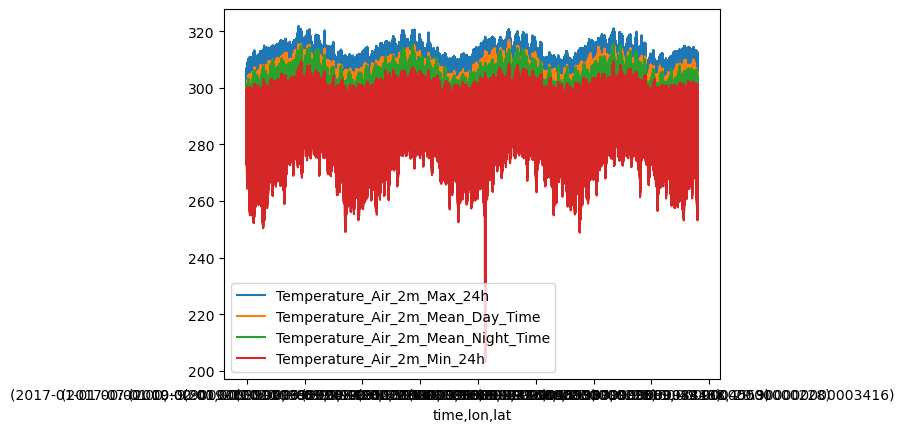

In [14]:
# plot line graph
df.plot()





In [15]:
len(df)

15600000

first we need to take the location as input, this is pretty accurate 

1. want to define the size of their plot in km2 
2. the type of crop they are planting on this plot 
3. information and history of the their climate 
    Here we have humidity/dewpoint, relative humidity
    temperate
    wind speed
    number of hours of cloud cover
    precipation/ fraction, and total mass
    Solar radiation
    Vapor pressure
4. we want to first of all plot this information for each variable of the coresponding 10x10km plot of land

steps:
- identify correct plot 
- 



In [57]:
c = cdsapi.Client()

dataset = c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'format': 'tgz',
        'variable': '2m_temperature',
        'year': '2023',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            'day_time_maximum', 'day_time_mean', 'night_time_mean',
            'night_time_minimum',
        ],
        'month': [
            '01', '02', '03',
            '04',
        ],
        'day': '01',
        'area': [
            47.44, 9.37, 47.43,
            9.38,
        ],
    },
    'download_1.tar.gz')

2023-05-08 16:46:51,333 INFO Welcome to the CDS
2023-05-08 16:46:51,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 16:46:51,412 INFO Request is completed
2023-05-08 16:46:51,413 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/dataset-sis-agrometeorological-indicators-5de71258-b377-448b-9cf0-e7c7f96a2829.tar.gz to download.tar.gz (141.7M)
2023-05-08 16:47:20,411 INFO Download rate 4.9M/s  


In [40]:
import tarfile 

In [41]:
with tarfile.open('download.tar.gz', 'r:gz') as tar:
    # Extract all .nc files from the .tar.gz file
    tar.extractall(path='data')

In [46]:
ds = nc.open_data("data/*.nc")
df_1 = ds.to_dataframe()

In [63]:
print(type(ds))

<class 'nctoolkit.api.DataSet'>


In [47]:
df_1 = df_1.reset_index()

In [48]:
df_1.head()

,lat,lon,time,Temperature_Air_2m_Max_24h,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Mean_24h,Temperature_Air_2m_Mean_Day_Time,Temperature_Air_2m_Mean_Night_Time,Temperature_Air_2m_Min_24h,Temperature_Air_2m_Min_Night_Time
0,90.0,-180.0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90.0,-180.0,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90.0,-180.0,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90.0,-180.0,2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90.0,-179.9,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
column_names = df_1.columns

print(column_names)

Index(['lat', 'lon', 'time', 'Temperature_Air_2m_Max_24h',
       'Temperature_Air_2m_Max_Day_Time', 'Temperature_Air_2m_Mean_24h',
       'Temperature_Air_2m_Mean_Day_Time',
       'Temperature_Air_2m_Mean_Night_Time', 'Temperature_Air_2m_Min_24h',
       'Temperature_Air_2m_Min_Night_Time'],
      dtype='object')


In [50]:
df_1.dropna(thresh=7, subset=['Temperature_Air_2m_Max_24h',
       'Temperature_Air_2m_Max_Day_Time', 'Temperature_Air_2m_Mean_24h',
       'Temperature_Air_2m_Mean_Day_Time',
       'Temperature_Air_2m_Mean_Night_Time', 'Temperature_Air_2m_Min_24h',
       'Temperature_Air_2m_Min_Night_Time'])

,lat,lon,time,Temperature_Air_2m_Max_24h,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Mean_24h,Temperature_Air_2m_Mean_Day_Time,Temperature_Air_2m_Mean_Night_Time,Temperature_Air_2m_Min_24h,Temperature_Air_2m_Min_Night_Time
884112,83.9,-37.2,2023-01-01,252.530228,250.972656,250.663406,249.943985,249.530563,249.293961,248.941040
884113,83.9,-37.2,2023-02-01,249.142456,247.937561,248.019211,247.526535,248.665115,247.068192,247.272018
884114,83.9,-37.2,2023-03-01,252.426620,249.986679,250.059113,249.598953,250.745209,248.662537,248.927094
884115,83.9,-37.2,2023-04-01,251.998611,252.007797,251.565430,251.559250,250.722549,250.273270,250.370697
884116,83.9,-37.1,2023-01-01,252.560699,251.003693,250.684464,249.963715,249.552582,249.309418,248.959229
...,...,...,...,...,...,...,...,...,...,...
25934395,-90.0,179.8,2023-04-01,237.473541,236.313110,231.942764,230.035110,229.829224,229.881317,230.286621
25934396,-90.0,179.9,2023-01-01,247.839111,247.842987,247.267593,247.445190,245.005386,244.387070,244.088364
25934397,-90.0,179.9,2023-02-01,241.775452,241.772797,239.737640,239.645798,240.054413,239.311859,239.305222
25934398,-90.0,179.9,2023-03-01,229.321945,228.191299,225.951736,226.554092,229.733719,225.298584,227.992538


In [51]:
target_lat = 47.4332215869252
target_lon = 9.37558019624494

df_1['distance'] = ((df_1['lat'] - target_lat)**2 + (df_1['lon'] - target_lon)**2)**0.5

In [56]:
df_1.head(30)

,lat,lon,time,Temperature_Air_2m_Max_24h,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Mean_24h,Temperature_Air_2m_Mean_Day_Time,Temperature_Air_2m_Mean_Night_Time,Temperature_Air_2m_Min_24h,Temperature_Air_2m_Min_Night_Time,distance
25920000,-90.0,-180.0,2023-01-01,247.839111,247.842987,247.267593,247.445190,245.005386,244.387070,244.088364,233.989318
25920001,-90.0,-180.0,2023-02-01,241.775452,241.772797,239.737640,239.645798,240.054413,239.311859,239.305222,233.989318
25920003,-90.0,-180.0,2023-04-01,237.473541,236.313110,231.942764,230.035110,229.829224,229.881317,230.286621,233.989318
25920002,-90.0,-180.0,2023-03-01,229.321945,228.191299,225.951736,226.554092,229.733719,225.298584,227.992538,233.989318
25905602,-89.9,-180.0,2023-03-01,229.223816,228.075134,225.867477,226.466965,229.634415,225.242188,227.909302,233.930597
25905603,-89.9,-180.0,2023-04-01,237.261490,236.070129,231.714432,229.816910,229.618713,229.633255,230.039124,233.930597
25905600,-89.9,-180.0,2023-01-01,247.760880,247.758209,247.165054,247.342545,244.914780,244.272095,243.975845,233.930597
25905601,-89.9,-180.0,2023-02-01,241.696228,241.677292,239.650696,239.559814,239.968704,239.216995,239.207199,233.930597
25920007,-90.0,-179.9,2023-04-01,237.473541,236.313110,231.942764,230.035110,229.829224,229.881317,230.286621,233.908392
25920006,-90.0,-179.9,2023-03-01,229.321945,228.191299,225.951736,226.554092,229.733719,225.298584,227.992538,233.908392


In [55]:
df_1 = df_1.sort_values(by='distance', ascending=False)

ok so we cannot simply request a certain region, it will return every single region an give the ones we do not request nan values 

therefore we will have to build one mega databes which contains every single value we need 

question is whether we filter them before or we filter them afterwards, it probably makes sense to filter them before joining to save computation

Therefore we will build a pipeline that sends requests for each value we need 

In [ ]:
c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'format': 'tgz',
        'variable': '2m_temperature',
        'year': '2023',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            'day_time_maximum', 'day_time_mean', 'night_time_mean',
            'night_time_minimum',
        ],
        'month': [
            '01', '02', '03',
            '04',
        ],
        'day': '01',
        'area': [
            47.44, 9.37, 47.43,
            9.38],
    },
    'download_1.tar.gz')

In [ ]:
with tarfile.open('download.tar.gz', 'r:gz') as tar:
    # Extract all .nc files from the .tar.gz file
    tar.extractall(path='data')

ds = nc.open_data("data/*.nc")

# Big Pipeline

we go through the entire api month by month, year by year. Then we concatinate all the files together and build one super dooper big dataframe

Lets hope this works

Build a list of all the variables that we will change

In [1]:
import cdsapi
import nctoolkit as nc
import matplotlib.pyplot as plt
import pandas as pd
import tarfile 

Please install CDO version 1.9.7 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo


In [49]:
params ={
        'format': 'tgz',
        'variable': '2m_temperature',
        'year': '2023',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            'day_time_maximum', 'day_time_mean', 'night_time_mean',
            'night_time_minimum',
        ],
        'month': '01',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
    }

In [7]:
# define years
years= []
for i in range(1979, 2024):
    years.append(str(i))
print(years)

['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [33]:
# define months
months = []
for i in range(1, 13):
    months.append(str(i).zfill(2))
print(months)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [43]:
iterator = []
for i in years:
    if i == "2023":
        for t in range(1,5):
            print(f"month: {t}, year: {i}")
            p = str(t).zfill(2)
            print(p)
            iterator.append({"month": p, "year": i})
    else:
        for t in months:
            print(f"month: {t}, year: {i}")
            iterator.append({"month": t, "year": i})

month: 01, year: 1979
month: 02, year: 1979
month: 03, year: 1979
month: 04, year: 1979
month: 05, year: 1979
month: 06, year: 1979
month: 07, year: 1979
month: 08, year: 1979
month: 09, year: 1979
month: 10, year: 1979
month: 11, year: 1979
month: 12, year: 1979
month: 01, year: 1980
month: 02, year: 1980
month: 03, year: 1980
month: 04, year: 1980
month: 05, year: 1980
month: 06, year: 1980
month: 07, year: 1980
month: 08, year: 1980
month: 09, year: 1980
month: 10, year: 1980
month: 11, year: 1980
month: 12, year: 1980
month: 01, year: 1981
month: 02, year: 1981
month: 03, year: 1981
month: 04, year: 1981
month: 05, year: 1981
month: 06, year: 1981
month: 07, year: 1981
month: 08, year: 1981
month: 09, year: 1981
month: 10, year: 1981
month: 11, year: 1981
month: 12, year: 1981
month: 01, year: 1982
month: 02, year: 1982
month: 03, year: 1982
month: 04, year: 1982
month: 05, year: 1982
month: 06, year: 1982
month: 07, year: 1982
month: 08, year: 1982
month: 09, year: 1982
month: 10,

now we have all the components we need, the total amount of files we will download is 532 combinations

we should specify a location to download to

In [55]:
c = cdsapi.Client()

In [56]:
file_name = "data_.tar.gz"
for i in range(0, len(iterator)):
    print(iterator[i])
    params["month"] = iterator[i]["month"]
    params["year"] = iterator[i]["year"]
    file_name = f"data_{iterator[i]['year']}_{iterator[i]['month']}.tar.gz"
    
    c.retrieve('sis-agrometeorological-indicators', params, file_name)

2023-05-08 17:59:31,438 INFO Welcome to the CDS
2023-05-08 17:59:31,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 17:59:31,506 INFO Request is queued


{'month': '01', 'year': '1979'}


2023-05-08 17:59:32,547 INFO Request is running
2023-05-08 18:01:25,329 INFO Request is completed
2023-05-08 18:01:25,329 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/dataset-sis-agrometeorological-indicators-b35c5e4a-fe84-4ff7-a256-0c2c1a49c49a.tar.gz to data_1979_01.tar.gz (1.1G)
2023-05-08 18:06:11,860 INFO Download rate 4.1M/s   
2023-05-08 18:06:12,039 INFO Welcome to the CDS
2023-05-08 18:06:12,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:06:12,172 INFO Request is queued


{'month': '02', 'year': '1979'}


2023-05-08 18:06:13,224 INFO Request is running
2023-05-08 18:08:05,916 INFO Request is completed
2023-05-08 18:08:05,918 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-c56c6424-499d-4996-a536-54c6eae6bcc0.tar.gz to data_1979_02.tar.gz (1G)
2023-05-08 18:12:52,923 INFO Download rate 3.7M/s   
2023-05-08 18:12:53,097 INFO Welcome to the CDS
2023-05-08 18:12:53,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:12:53,149 INFO Request is queued


{'month': '03', 'year': '1979'}


2023-05-08 18:12:54,186 INFO Request is running
2023-05-08 18:14:46,908 INFO Request is completed
2023-05-08 18:14:46,909 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-5148f80a-abd1-4659-99ef-1b69cd8f1ed1.tar.gz to data_1979_03.tar.gz (1.1G)
2023-05-08 18:19:23,668 INFO Download rate 4.2M/s   
2023-05-08 18:19:23,833 INFO Welcome to the CDS
2023-05-08 18:19:23,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:19:23,930 INFO Request is queued


{'month': '04', 'year': '1979'}


2023-05-08 18:19:24,981 INFO Request is running
2023-05-08 18:21:17,691 INFO Request is completed
2023-05-08 18:21:17,692 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-f818bb60-c8dc-4368-8230-77911513e2eb.tar.gz to data_1979_04.tar.gz (1.1G)
2023-05-08 18:25:54,463 INFO Download rate 4M/s     
2023-05-08 18:25:54,710 INFO Welcome to the CDS
2023-05-08 18:25:54,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:25:54,791 INFO Request is queued


{'month': '05', 'year': '1979'}


2023-05-08 18:25:55,826 INFO Request is running
2023-05-08 18:27:48,546 INFO Request is completed
2023-05-08 18:27:48,555 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-d26b4ec3-485a-4642-89af-f74f43f46af3.tar.gz to data_1979_05.tar.gz (1.1G)
2023-05-08 18:33:56,835 INFO Download rate 3.1M/s   
2023-05-08 18:33:57,323 INFO Welcome to the CDS
2023-05-08 18:33:57,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:33:57,373 INFO Request is queued


{'month': '06', 'year': '1979'}


2023-05-08 18:33:58,418 INFO Request is running
2023-05-08 18:35:51,131 INFO Request is completed
2023-05-08 18:35:51,146 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/dataset-sis-agrometeorological-indicators-02f86986-c809-45bd-bab6-443ab07dfb74.tar.gz to data_1979_06.tar.gz (1.1G)
2023-05-08 18:40:19,073 INFO Download rate 4.2M/s   
2023-05-08 18:40:19,338 INFO Welcome to the CDS
2023-05-08 18:40:19,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:40:19,378 INFO Request is queued


{'month': '07', 'year': '1979'}


2023-05-08 18:40:20,419 INFO Request is running
2023-05-08 18:42:13,090 INFO Request is completed
2023-05-08 18:42:13,094 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data0/dataset-sis-agrometeorological-indicators-4fe45298-29b5-44ca-b803-ae023e2f78b6.tar.gz to data_1979_07.tar.gz (1.1G)
2023-05-08 18:47:44,342 INFO Download rate 3.5M/s   
2023-05-08 18:47:44,526 INFO Welcome to the CDS
2023-05-08 18:47:44,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-05-08 18:47:44,590 INFO Request is queued


{'month': '08', 'year': '1979'}


2023-05-08 18:47:45,627 INFO Request is running
2023-05-08 18:49:38,567 INFO Request is completed
2023-05-08 18:49:38,748 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-1909c450-8dd2-4568-af97-202dccaf43b6.tar.gz to data_1979_08.tar.gz (1.1G)
2023-05-08 18:54:25,293 INFO Download rate 4M/s     
2023-05-08 18:54:25,840 INFO Welcome to the CDS
2023-05-08 18:54:25,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


{'month': '09', 'year': '1979'}


2023-05-08 18:54:55,915 WARNING HTTP error: [504 Gateway Time-out]. Attempt 1 of 500.
2023-05-08 18:54:55,921 WARNING Retrying in 120 seconds
2023-05-08 18:56:55,924 INFO Retrying now...
2023-05-08 18:57:26,088 WARNING HTTP error: [500 Internal Server Error]. Attempt 2 of 500.
2023-05-08 18:57:26,090 WARNING Retrying in 120 seconds


KeyboardInterrupt: 

In [ ]:
c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'format': 'tgz',
        'variable': '2m_temperature',
        'year': '2023',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            'day_time_maximum', 'day_time_mean', 'night_time_mean',
            'night_time_minimum',
        ],
        'month': [
            '01', '02', '03',
            '04',
        ],
        'day': '01',
        'area': [
            47.44, 9.37, 47.43,
            9.38],
    },
    'download_1.tar.gz')

# Converting CSV to reasonable pandas to crease the different visualizations

First we will start with the forecasts

We merge together the rcp45 predictions

In [18]:
# need to check if there are any overlaps, could be that the mean csv files have the same content as the other ones

# we have a couple of different categories: cloud cover; monthy and annual mean 

df_45_cloud_monthly_mean = pd.read_csv("D:\Series\Capstone Files\Forecast_csv\cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv")

In [19]:
# we need to cut the time frame down to 2015 because we dont have data all the way back
type(df_45_cloud_monthly_mean["time"])

# convert the time column to datetime
df_45_cloud_monthly_mean["time"] = pd.to_datetime(df_45_cloud_monthly_mean["time"])

In [20]:
df_45_cloud_monthly_mean["time"]

# we need to cut the time frame down to 2015 because we dont have data all the way back

df_45_cloud_monthly_mean = df_45_cloud_monthly_mean[df_45_cloud_monthly_mean["time"] >= "2015-01-01"]

df_45_cloud_annual_mean.head()

In [21]:
df_45_cloud_monthly_mean.head()

# rename column cloud-cover to cloud-cover-annual-mean

df_45_cloud_monthly_mean = df_45_cloud_monthly_mean.rename(columns={"cloud-cover": "cloud-cover-monthly-mean"})

In [23]:
df_45_cloud_monthly_mean.head()

,latitude,longitude,time,cloud-cover-monthly-mean
780,-2.75,29.25,2015-01-01,0.803124
781,-2.75,29.25,2015-02-01,0.826621
782,-2.75,29.25,2015-03-01,0.788926
783,-2.75,29.25,2015-04-01,0.888127
784,-2.75,29.25,2015-05-01,0.742990


In [38]:
path = "D:/Series/Capstone Files/Forecast_csv/rcp45"
lst = os.listdir(path)

In [27]:
lst

['cloud-cover_annual-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv',
 'precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv',
 'temperature_annual-maximum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'temperature_annual-minimum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv',
 'temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv',
 'temperature_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv',
 'tempera

In [29]:








merged_df = pd.merge(df_45_cloud_monthly_mean.sort_values('time'), df_45_cloud_annual_mean.sort_values('time'), on=['time', 'latitude', 'longitude'], how='left')

merged_df.head(20)

,latitude,longitude,time,cloud-cover-monthly-mean,cloud-cover-annual-mean
0,-2.75,29.25,2015-01-01,0.803124,0.760105
1,49.75,-0.75,2015-01-01,0.749290,0.638075
2,42.75,-2.25,2015-01-01,0.672593,0.642522
3,46.25,-0.75,2015-01-01,0.717456,0.597994
4,46.25,1.75,2015-01-01,0.754837,0.646635
5,46.75,5.75,2015-01-01,0.694698,0.603328
6,45.25,8.75,2015-01-01,0.563207,0.529013
7,44.25,8.25,2015-01-01,0.442604,0.552120
8,47.75,4.25,2015-01-01,0.768702,0.650853
9,49.75,-1.25,2015-01-01,0.759157,0.641801


In [39]:
lst.pop(1)

'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0.csv'

In [40]:
rcp45 = pd.read_csv("D:/Series/Capstone Files/Forecast_csv/rcp45/cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.csv")
rcp45["time"] = pd.to_datetime(rcp45["time"])

rcp45 = rcp45[rcp45["time"] >= "2015-01-01"]

rcp45.rename(columns={rcp45.columns[-1]: 'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0'}, inplace=True)

for i in lst:
    df = pd.read_csv(f"D:/Series/Capstone Files/Forecast_csv/rcp45/{i}")
    i = i[:-4]
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["time"] >= "2015-01-01"]
    df.rename(columns={df.columns[-1]: f"{i}"}, inplace=True)
    rcp45 = pd.merge(rcp45.sort_values('time'), df.sort_values('time'), on=['time', 'latitude', 'longitude'], how='left')
rcp45.head(20)

,latitude,longitude,time,cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0_x,cloud-cover_annual-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0_y,precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0,temperature_annual-maximum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,temperature_annual-minimum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0,temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0,temperature_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,temperature_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0,water-vapor-pressure_annual-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,water-vapor-pressure_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0,water-vapor-pressure_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
0,-2.75,29.25,2015-01-01,0.803124,0.760105,0.803124,9.076994e-08,8.757379e-08,302.00214,284.19397,297.71356,297.99847,288.31262,288.36670,292.69363,292.79895,956.59970,980.42760,993.50510
1,46.75,7.25,2015-01-01,0.663451,0.613441,0.663451,4.581847e-08,5.239518e-08,303.06076,258.40600,275.57703,272.18314,268.30133,263.13376,271.93912,270.47327,717.70710,529.10870,510.28394
2,47.75,5.25,2015-01-01,0.772624,0.645144,0.772624,3.654735e-08,4.608249e-08,306.23685,263.86954,277.73140,277.21765,272.86720,270.61090,275.23932,274.60297,777.26733,628.20447,623.69324
3,42.75,-1.25,2015-01-01,0.616905,0.585634,0.616905,3.708833e-08,3.697418e-08,306.91956,265.64038,280.76965,281.48540,273.62833,274.08838,276.98453,277.35120,777.10944,636.65936,648.80695
4,43.25,5.75,2015-01-01,0.371513,0.410831,0.371513,2.310049e-08,8.225481e-09,302.71344,272.99887,284.11880,283.88937,278.75412,276.55045,281.13193,280.50740,858.11800,696.62840,659.01965
5,48.75,5.75,2015-01-01,0.791584,0.661944,0.791584,3.422789e-08,4.902309e-08,306.25970,263.57584,277.44070,277.11400,272.98400,270.93063,275.20776,274.47336,775.07623,629.00390,618.33154
6,46.75,4.75,2015-01-01,0.753677,0.618666,0.753677,3.445380e-08,4.092384e-08,308.25757,265.14080,278.91284,278.24762,273.61234,270.85464,276.18940,275.54965,789.88580,637.17330,635.60474
7,45.25,6.75,2015-01-01,0.622817,0.626460,0.622817,4.051921e-08,2.872041e-08,295.63680,247.84190,267.01556,264.75284,260.20870,254.39188,263.63345,262.24990,572.59670,388.68356,363.37888
8,44.25,1.75,2015-01-01,0.660891,0.574029,0.660891,3.150612e-08,3.019783e-08,308.40842,266.74356,281.92142,282.24698,275.13840,274.81485,278.35803,277.99988,811.15510,668.90690,673.02790
9,44.25,8.25,2015-01-01,0.442604,0.552120,0.442604,2.815071e-08,4.379185e-09,302.63520,268.94568,281.02637,280.51870,275.02997,271.90170,277.68510,276.76712,825.30730,610.50440,559.10710


In [35]:
for i in lst:
    print(i[:-4])

cloud-cover_annual-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
precipitation_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
temperature_annual-maximum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
temperature_annual-minimum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
temperature_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100-mean_v1.0
temperature_monthly-mean_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0
water-vapor-pressure_annual-mean_ipsl-c

In [41]:
path = "D:/Series/Capstone Files/Forecast_csv/rcp85"
lst = os.listdir(path)

In [ ]:
lst.pop(1)

In [42]:
rcp85 = pd.read_csv("D:/Series/Capstone Files/Forecast_csv/rcp85/cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0.csv")
rcp85["time"] = pd.to_datetime(rcp85["time"])

rcp85 = rcp85[rcp85["time"] >= "2015-01-01"]

rcp85.rename(columns={rcp85.columns[-1]: 'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0'}, inplace=True)

for i in lst:
    df = pd.read_csv(f"D:/Series/Capstone Files/Forecast_csv/rcp85/{i}")
    i = i[:-4]
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["time"] >= "2015-01-01"]
    df.rename(columns={df.columns[-1]: f"{i}"}, inplace=True)
    rcp85 = pd.merge(rcp85.sort_values('time'), df.sort_values('time'), on=['time', 'latitude', 'longitude'], how='left')
rcp85.head(20)

,latitude,longitude,time,cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0_x,cloud-cover_annual-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0_y,precipitation_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,precipitation_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0,temperature_annual-maximum_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,temperature_annual-minimum_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,temperature_daily-maximum-monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0,temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,temperature_daily-minimum-monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0,temperature_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,temperature_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0,water-vapor-pressure_annual-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,water-vapor-pressure_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100-mean_v1.0,water-vapor-pressure_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0
0,-2.75,29.25,2015-01-01,0.833838,0.758233,0.828957,0.833838,9.056610e-08,9.750168e-08,302.10263,284.17172,297.56583,297.55307,288.33957,288.34670,292.71634,292.55420,949.70710,977.57745,993.84970
1,48.75,-3.75,2015-01-01,0.769221,0.646948,0.736614,0.769221,4.740273e-08,6.661658e-08,296.12787,274.42642,283.07810,282.85060,280.34433,281.14096,281.75357,281.44025,839.23110,732.30273,725.11150
2,43.25,0.75,2015-01-01,0.683985,0.595832,0.648924,0.683985,3.690843e-08,5.265995e-08,308.30634,268.05440,283.18410,282.17255,275.85547,274.74545,278.96720,278.25372,833.01230,667.62646,664.66790
3,46.25,5.75,2015-01-01,0.686171,0.614288,0.663131,0.686171,5.598850e-08,7.092552e-08,304.66116,261.61035,277.31665,277.09747,271.57600,270.22815,274.26340,273.49756,771.16710,589.20044,584.25630
4,46.25,-4.75,2015-01-01,0.790189,0.616305,0.737820,0.790189,3.957162e-08,6.251456e-08,295.34330,277.41962,284.92300,284.30826,283.39783,283.66080,284.11330,283.50357,870.69617,768.75397,762.44855
5,-2.25,30.75,2015-01-01,0.790369,0.721051,0.755922,0.790369,4.949404e-08,5.083610e-08,304.48846,287.48804,299.45294,299.16977,290.20132,290.28705,294.42905,294.12805,1012.24760,1050.45680,1064.64370
6,43.75,0.25,2015-01-01,0.708843,0.586158,0.667940,0.708843,2.765515e-08,4.660912e-08,309.06296,267.25443,283.34720,282.55290,276.49216,275.81638,279.45203,278.81943,847.50310,692.27500,693.06274
7,43.25,-3.25,2015-01-01,0.710891,0.644597,0.685391,0.710891,4.446532e-08,6.570029e-08,303.60580,270.99728,283.78440,282.49966,278.69678,277.94138,280.94666,280.23060,847.24840,709.46600,711.41720
8,45.75,5.75,2015-01-01,0.684298,0.603766,0.664383,0.684298,4.883330e-08,6.476569e-08,305.69678,262.84076,277.98193,277.42240,271.42682,270.12228,274.53342,273.72742,778.34360,585.42130,579.44590
9,43.75,-0.75,2015-01-01,0.721691,0.598955,0.683399,0.721691,3.451553e-08,5.496858e-08,309.81330,267.40524,284.10947,283.13763,276.85785,276.37445,280.05905,279.41092,858.47910,704.24500,704.54410


In [43]:
rcp45.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/rcp45.csv', index=False)

In [44]:
rcp85.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/rcp85.csv', index=False)

In [53]:
path = "D:/Series/Capstone Files/Cloud_csv/Percipitation_cloud"
lst = os.listdir(path)

In [55]:
lst

['Precipitation-Flux_C3S-glob-agric_AgERA5_20150101_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150102_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150103_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150104_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150105_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150106_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150107_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150108_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150109_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150110_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150111_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150112_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150113_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agric_AgERA5_20150114_final-v1.0.csv',
 'Precipitation-Flux_C3S-glob-agri

In [54]:
len(lst)

1827

In [ ]:
lst.pop(1)

In [ ]:
rcp85 = pd.read_csv("D:/Series/Capstone Files/Forecast_csv/rcp85/cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0.csv")
rcp85["time"] = pd.to_datetime(rcp85["time"])

rcp85 = rcp85[rcp85["time"] >= "2015-01-01"]

rcp85.rename(columns={rcp85.columns[-1]: 'cloud-cover_monthly-mean_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0'}, inplace=True)

for i in lst:
    df = pd.read_csv(f"D:/Series/Capstone Files/Forecast_csv/rcp85/{i}")
    i = i[:-4]
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["time"] >= "2015-01-01"]
    df.rename(columns={df.columns[-1]: f"{i}"}, inplace=True)
    rcp85 = pd.merge(rcp85.sort_values('time'), df.sort_values('time'), on=['time', 'latitude', 'longitude'], how='left')
rcp85.head(20)

In [49]:
cloud_test_1 = pd.read_csv(f"D:/Series/Capstone Files/Cloud_csv/Cloud_Cover_Mean/{lst[0]}")
cloud_test_2 = pd.read_csv(f"D:/Series/Capstone Files/Cloud_csv/Cloud_Cover_Mean/{lst[1]}")

In [ ]:
df_cloud_cover

In [57]:
def reading_dataframes(filename):
    df = pd.read_csv(f"D:/Series/Capstone Files/Cloud_csv/Percipitation_cloud/{filename}")
    return df

In [58]:


df_list = [reading_dataframes(f) for f in lst]
df_percipitation_cloud = pd.concat(df_list)


In [50]:
cloud_test_1["time"]

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
14794    2017-01-01
14795    2017-01-01
14796    2017-01-01
14797    2017-01-01
14798    2017-01-01
Name: time, Length: 14799, dtype: object

In [88]:
path = "D:/Series/Capstone Files/Temp_csv/2m mean day time"
lst = os.listdir(path)
print(len(lst))

3042


In [89]:
lst

['Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150101_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150102_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150103_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150104_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150105_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150106_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150107_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150108_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150109_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150110_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150111_final-v1.0.csv',
 'Temperature-Air-2m-Mean-Day-Time_C3S-glob-agric_AgERA5_20150112_final-v1.0.csv',
 'Te

In [90]:

df_list = [reading_dataframes(path,f) for f in lst]
df_Temp_mean_day = pd.concat(df_list)


In [93]:
df_Temp_mean_day.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/Temp_mean_day.csv', index=False)

In [94]:
path = "D:/Series/Capstone Files/Temp_csv/2m mean night time"
lst = os.listdir(path)
print(len(lst))
df_list = [reading_dataframes(path,f) for f in lst]
df_Temp_mean_night = pd.concat(df_list)
df_Temp_mean_night.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/Temp_mean_night.csv', index=False)

3042


In [95]:
path = "D:/Series/Capstone Files/Temp_csv/2m min 24h"
lst = os.listdir(path)
print(len(lst))
df_list = [reading_dataframes(path,f) for f in lst]
df_Temp_min_24h = pd.concat(df_list)
df_Temp_min_24h.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/Temp_min_24h.csv', index=False)

3042


In [96]:
path = "D:/Series/Capstone Files/Temp_csv/2m min night time"
lst = os.listdir(path)
print(len(lst))
df_list = [reading_dataframes(path,f) for f in lst]
df_Temp_min_night = pd.concat(df_list)
df_Temp_min_night.to_csv('D:/Git repos/Capstone 2/Capstone/Processed csv/Temp_min_night.csv', index=False)

3042


In [87]:
df_Temp_mean_day.head()

,time,lon,lat,Temperature_Air_2m_Mean_24h
0,2015-01-01,-5.1,51.0,NaN
1,2015-01-01,-5.1,50.9,NaN
2,2015-01-01,-5.1,50.8,NaN
3,2015-01-01,-5.1,50.7,285.41470
4,2015-01-01,-5.1,50.6,285.49078
